<a href="https://colab.research.google.com/github/dimakpa/ML_Projects/blob/main/%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пример апроксимации данных ядерным сглаживанием

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Началаьные данные

In [15]:
x = np.arange(0, 20, 0.1)           # отсчеты для исходного сигнала в диапазоне от 0 до 10 с шагом 0.1
x_est = np.arange(0, 20, 0.01)      # отсчеты, где производится восстановление функции
N = len(x) # размер отсчета
y_sin = np.sin(x) # выходные данные
y = y_sin + np.random.normal(0, 0.5, N) # к функции синуса добавляем гаусовский шум

Сама апроксимация различными ядрами

In [3]:
h = 1.0     # при окне меньше 0.1 для финитных ядер будут ошибки

K1 = lambda r: np.exp(-2 * r * r)        # гауссовское ядро
K2 = lambda r: np.abs(1 - r) * bool(r <= 1)        # треугольное ядро
K3 = lambda r: bool(r <= 1)        # прямоугольное ядро

Метрика RO как модуль разности

Веса определяются как гаусовское окно от метрики RO деленой на величину окна 

In [4]:
ro = lambda xx, xi: np.abs(xx - xi)     # метрика
w1 = lambda xx, xi: K1(ro(xx, xi) / h)    # веса
w2 = lambda xx, xi: K2(ro(xx, xi) / h)    # веса
w3 = lambda xx, xi: K3(ro(xx, xi) / h)    # веса

Внутри цикла будем проводить апроксимацию с гауссовским ядром.

Внутри цикла пробегаем от 0 до 10 с шагом 0.01. Восстанавливаем с помощью вормулы. ww - весовые коэф необходимые для восстановления. y_est - в него добавляем восстановленное значение yy. 

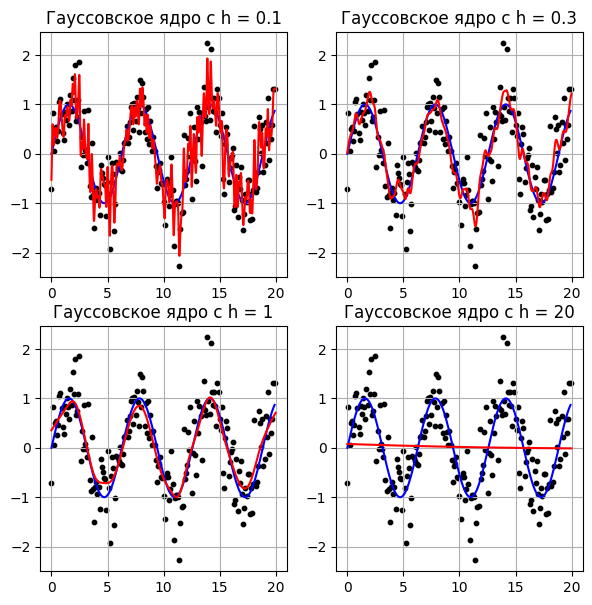

In [16]:
plt.figure(figsize=(7, 7))
plot_number = 0

for h in [0.1, 0.3, 1, 20]:
    y_est = []
    for xx in x_est:
        ww = np.array([w1(xx, xi) for xi in x])
        yy = np.dot(ww, y) / sum(ww)            # формула Надарая-Ватсона
        y_est.append(yy)

    plot_number += 1
    plt.subplot(2, 2, plot_number)

    plt.scatter(x, y, color='black', s=10)
    plt.plot(x, y_sin, color='blue')
    plt.plot(x_est, y_est, color='red')
    plt.title(f"Гауссовское ядро с h = {h}")
    plt.grid()

plt.show()

Внутри цикла будем проводить апроксимацию с треугольным ядром.

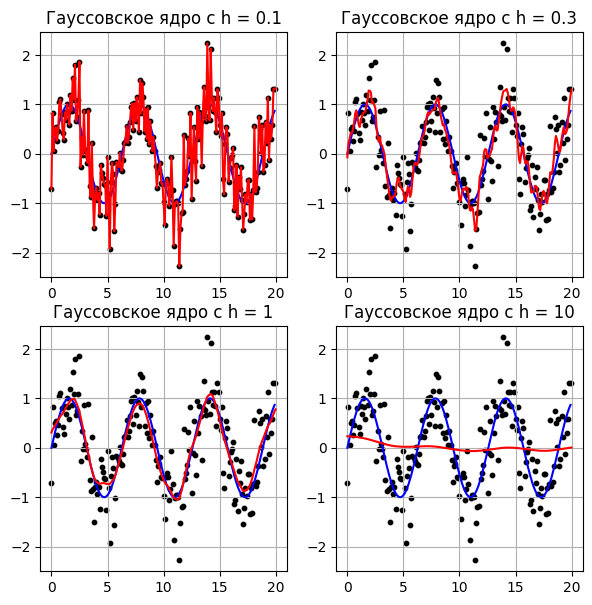

In [17]:
plt.figure(figsize=(7, 7))
plot_number = 0

for h in [0.1, 0.3, 1, 10]:
    y_est = []
    for xx in x_est:
        ww = np.array([w2(xx, xi) for xi in x])
        yy = np.dot(ww, y) / sum(ww)            # формула Надарая-Ватсона
        y_est.append(yy)

    plot_number += 1
    plt.subplot(2, 2, plot_number)

    plt.scatter(x, y, color='black', s=10)
    plt.plot(x, y_sin, color='blue')
    plt.plot(x_est, y_est, color='red')
    plt.title(f"Гауссовское ядро с h = {h}")
    plt.grid()

plt.show()

Внутри цикла будем проводить апроксимацию с прямоугольным ядром.

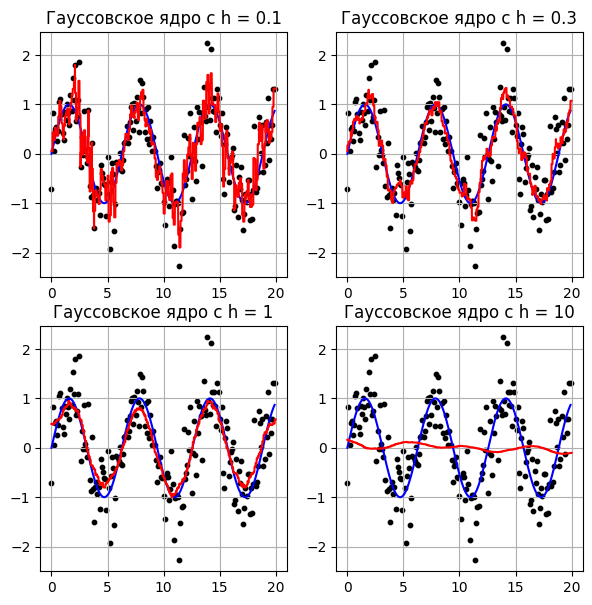

In [18]:
plt.figure(figsize=(7, 7))
plot_number = 0

for h in [0.1, 0.3, 1, 10]:
    y_est = []
    for xx in x_est:
        ww = np.array([w3(xx, xi) for xi in x])
        yy = np.dot(ww, y) / sum(ww)            # формула Надарая-Ватсона
        y_est.append(yy)

    plot_number += 1
    plt.subplot(2, 2, plot_number)

    plt.scatter(x, y, color='black', s=10)
    plt.plot(x, y_sin, color='blue')
    plt.plot(x_est, y_est, color='red')
    plt.title(f"Гауссовское ядро с h = {h}")
    plt.grid()

plt.show()